In [1]:
from example2 import PredPrey

/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/connectors/__init__.py:19: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)
/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/connectors/__init__.py:29: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/connectors/__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)


In [55]:
from ema_workbench import ema_logging, load_results
from ema_workbench import Model, RealParameter, CategoricalParameter, TimeSeriesOutcome, perform_experiments
import numpy as np
from ema_workbench.analysis.plotting import lines, Density
#from ema_workbench.em_framework.evaluators import LHS

from ema_workbench.em_framework.evaluators import Samplers

ema_logging.log_to_stderr(ema_logging.INFO)

#We can define common uncertainties and outcomes for each model:
uncertainties = [RealParameter('rmax', 1, 1.8),
                 RealParameter('K', 1500000000, 3500000000*2),
                 RealParameter('gamma', 200, 500),
                 RealParameter('cost', 20000, 40000),
                 RealParameter('m', 0.4, 1.2),
                 RealParameter('alpha', 0.1, 0.6),
                 RealParameter('env', 0.3, 0.8),
                 RealParameter('lobby', 1.2, 2),
                 #RealParameter('lobby', 1.2, 2),

                 #RealParameter('predator_efficiency', 0.001, 0.004),
                 #RealParameter('predator_loss_rate', 0.04, 0.08)
                ] 

outcomes = [TimeSeriesOutcome('TIME', function = np.squeeze),
            TimeSeriesOutcome('effort', function = np.squeeze),
            TimeSeriesOutcome('meeso', function = np.squeeze),
            TimeSeriesOutcome('catch', function = np.squeeze),
            TimeSeriesOutcome('sequestration', function = np.squeeze),
            TimeSeriesOutcome('cumulative_social_cost', function = np.squeeze),
            TimeSeriesOutcome('sequestration_pristine', function = np.squeeze)
           ]


#Define the Python model
py_model = Model('Python', function=PredPrey)
py_model.uncertainties = uncertainties
py_model.outcomes = outcomes

In [56]:
from ema_workbench import (SequentialEvaluator, save_results,
                          MultiprocessingEvaluator)
#nr_experiments = 100


with SequentialEvaluator(py_model) as evaluator: 
   results = evaluator.perform_experiments(scenarios=10000, uncertainty_sampling=Samplers.LHS)

#with MultiprocessingEvaluator(py_model) as evaluator:
    # results = perform_experiments(py_model, nr_experiments, evaluator=evaluator)


save_results(results, 'Data/results.tar.gz')

[MainProcess/INFO] performing 10000 scenarios * 1 policies * 1 model(s) = 10000 experiments
100%|███████████████████████████████████| 10000/10000 [00:15<00:00, 665.67it/s]
[MainProcess/INFO] experiments finished
/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/em_framework/outcomes.py:496: UserWarning: still to be tested!!
  warnings.warn("still to be tested!!")
[MainProcess/INFO] results saved successfully to /home/maartjeoostdijk/Documents/SES-model/Data/results.tar.gz


In [57]:
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis.plotting import kde_over_time
import seaborn as sns

ema_logging.log_to_stderr(ema_logging.INFO)

file_name = 'Data/results.tar.gz' 

experiments, outcomes = load_results(file_name)

[MainProcess/INFO] results loaded successfully from /home/maartjeoostdijk/Documents/SES-model/Data/results.tar.gz


In [58]:
print(results)


(                 K     alpha          cost       env       gamma     lobby  \
0     4.263775e+09  0.267044  33347.233280  0.702338  494.262661  1.491382   
1     2.881365e+09  0.220414  20459.284874  0.446910  322.735765  1.810511   
2     3.834633e+09  0.193838  33131.563794  0.578943  299.511742  1.969276   
3     4.120635e+09  0.178719  30236.683340  0.761132  252.703303  1.711087   
4     6.083667e+09  0.423363  38633.970115  0.503868  472.818850  1.306890   
...            ...       ...           ...       ...         ...       ...   
9995  5.440408e+09  0.187496  31166.354731  0.406524  461.389205  1.758539   
9996  1.994044e+09  0.295709  35711.717005  0.462870  321.271206  1.778920   
9997  5.238987e+09  0.400543  28414.770632  0.478378  357.220329  1.495556   
9998  6.341339e+09  0.526755  38065.105513  0.360832  478.825691  1.274405   
9999  1.738944e+09  0.334208  36034.433615  0.389089  398.232122  1.417839   

             m      rmax scenario policy   model  
0     1.058

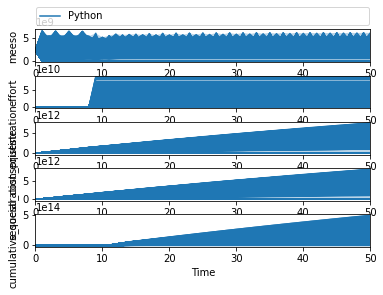

In [59]:
experiments_to_show = np.arange(0, experiments.shape[0], 1)
experiments_to_show
lines(experiments, outcomes, outcomes_to_show=('meeso','effort', 'sequestration','sequestration_pristine',
                                              'cumulative_social_cost'), group_by='model',
     show_envelope=True, titles=None, 
     experiments_to_show=experiments_to_show)
plt.show()

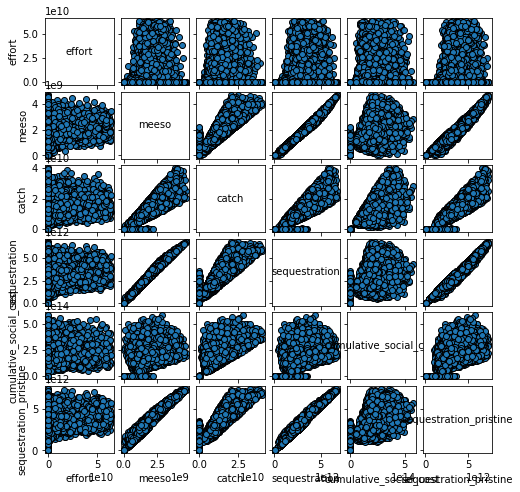

In [50]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by="policy", legend=False)
fig.set_size_inches(8, 8)
plt.show()



[MainProcess/WARNING] singular matrix
/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/analysis/plotting_util.py:366: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix


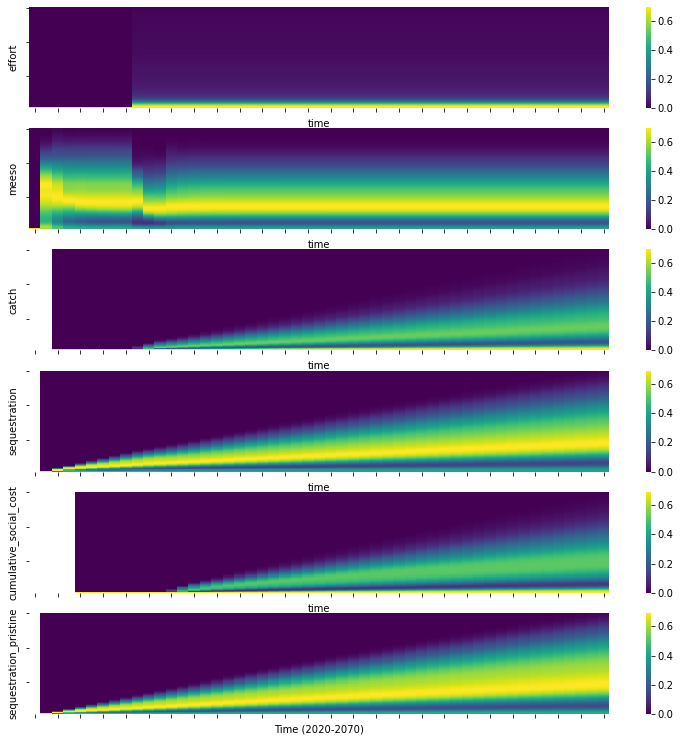

In [51]:
from ema_workbench.analysis.plotting import kde_over_time
import matplotlib.pyplot as plt

fig, axes = kde_over_time(experiments, outcomes, log=True)
ax = fig.get_axes()
fig.set_size_inches(13,13)

ax[5].set_xlabel('Time (2020-2070)')

plt.savefig('kde7_all4-withfishingnewmodel.png')


In [42]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes["sequestration"] < 1000
prim_alg = prim.Prim(x, y, threshold=1000)
box1 = prim_alg.find_box()
#print(y)

#print(outcomes["sequestration"])

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


PrimException: y is not a 1-d array

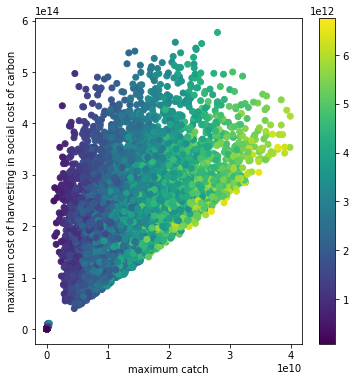

In [52]:
import matplotlib.pyplot as plt
import numpy as np

seq = outcomes['sequestration']
maxseq = np.max(seq, axis=1)

catch = outcomes['catch']
maxcatch = np.max(catch, axis=1)
scc = outcomes['cumulative_social_cost']
maxscc = np.max(scc, axis=1)

#print(maxscc)
#socialcost = (maxscc-2840053909602230)*-1
fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(maxcatch, maxscc,c=maxseq)
plt.colorbar(sc)
ax.set_xlabel('maximum catch')
ax.set_ylabel('maximum cost of harvesting in social cost of carbon')
#plt.show()

plt.savefig('correlation.png')



In [10]:
from ema_workbench.analysis import feature_scoring
import seaborn as sns

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


ValueError: The type of target cannot be used to compute OOB estimates. Got multiclass-multioutput while only the following are supported: continuous, continuous-multioutput, binary, multiclass, multilabel-indicator.

In [15]:
print(results[Time>30])

NameError: name 'Time' is not defined

In [26]:
import pandas as pd

exp = pd.DataFrame(experiments)
social = pd.DataFrame(maxscc)

In [27]:
print(exp)
print(social)

                 K     alpha       env       gamma     lobby         m  \
0     5.146556e+09  0.445892  0.494386  249.111561  1.254625  0.434326   
1     3.915626e+09  0.396016  0.581466  323.355939  1.763732  0.692218   
2     6.854597e+09  0.232914  0.355731  270.779979  1.899184  0.915189   
3     6.965839e+09  0.345628  0.624438  288.096011  1.266878  1.153039   
4     5.077964e+09  0.221706  0.652543  240.375027  1.645575  0.553547   
...            ...       ...       ...         ...       ...       ...   
9995  3.521353e+09  0.259287  0.604159  204.610260  1.510912  0.491049   
9996  4.390771e+09  0.228332  0.626240  354.827624  1.929250  0.904429   
9997  4.957601e+09  0.234813  0.703820  285.688149  1.225986  0.505814   
9998  3.577800e+09  0.422435  0.384019  339.617857  1.402727  0.730220   
9999  6.748313e+09  0.512206  0.748681  204.809597  1.239525  0.611099   

          rmax scenario policy   model  
0     1.209916    10000   None  Python  
1     0.979656    10001   Non

In [28]:
exp['social cost']=social


exp['environmental protection'] = pd.cut(exp['env'], bins=[0, 0.5, 0.7, float('Inf')], labels=['high', 'moderate', 'low'])
exp['industry lobby level'] = pd.cut(exp['lobby'], bins=[0, 1.3, 1.5, float('Inf')], labels=['low', 'moderate', 'high'])

print(exp)


                 K     alpha       env       gamma     lobby         m  \
0     5.146556e+09  0.445892  0.494386  249.111561  1.254625  0.434326   
1     3.915626e+09  0.396016  0.581466  323.355939  1.763732  0.692218   
2     6.854597e+09  0.232914  0.355731  270.779979  1.899184  0.915189   
3     6.965839e+09  0.345628  0.624438  288.096011  1.266878  1.153039   
4     5.077964e+09  0.221706  0.652543  240.375027  1.645575  0.553547   
...            ...       ...       ...         ...       ...       ...   
9995  3.521353e+09  0.259287  0.604159  204.610260  1.510912  0.491049   
9996  4.390771e+09  0.228332  0.626240  354.827624  1.929250  0.904429   
9997  4.957601e+09  0.234813  0.703820  285.688149  1.225986  0.505814   
9998  3.577800e+09  0.422435  0.384019  339.617857  1.402727  0.730220   
9999  6.748313e+09  0.512206  0.748681  204.809597  1.239525  0.611099   

          rmax scenario policy   model   social cost environmental protection  \
0     1.209916    10000   None

<AxesSubplot:xlabel='social cost', ylabel='environmental protection'>

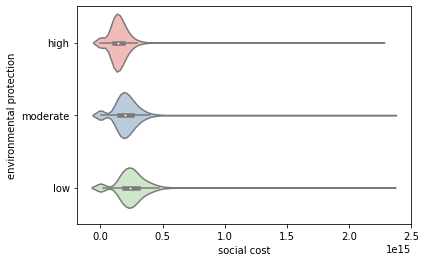

In [29]:
#print(exp.dtypes)

exp[['social cost']] = exp[['social cost']].apply(pd.to_numeric)
#print(exp.dtypes)
#exp = exp[exp['social cost']<500]
#g.map(sns.violinplot(x=exp['social cost'], palette="Pastel1"))
sns.violinplot(x=exp['social cost'], y=exp['environmental protection'], palette="Pastel1")

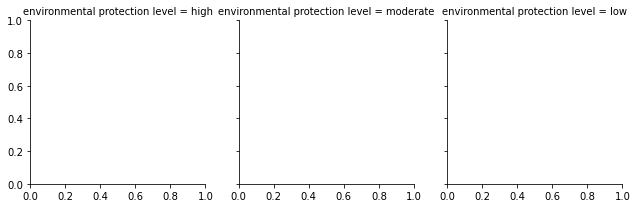

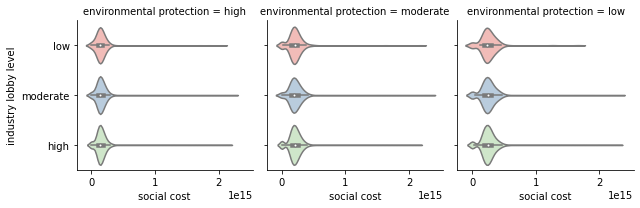

In [30]:
#g.map_dataframe(sns.violinplot("social cost", palette="Pastel1"))
g = sns.FacetGrid(exp, col="environmental protection")
g.map_dataframe(sns.violinplot, x="social cost", y="industry lobby level", palette="Pastel1")
plt.savefig('lobbyplot.png')


In [91]:
print(exp[['social cost']])

      social cost
0       21.407043
1       10.524658
2       16.549866
3       23.413025
4       11.468674
...           ...
9995    13.524841
9996    22.981262
9997    14.596893
9998     9.720268
9999    16.110764

[9997 rows x 1 columns]
